In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
def plot_sample(index):
  plt.figure(figsize=(10,1))
  plt.imshow(X_train[index])

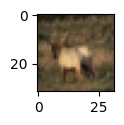

In [ ]:
plot_sample(3)

In [ ]:
classes = ["airplane", "automobile", "bird", "cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
classes[y_train[3][0]]

'deer'

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled =  X_test / 255

In [ ]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes = 10
)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes = 10
)


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # softmax for multi-class
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled,y_train_categorical, epochs=50)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3774 - loss: 1.7139
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5860 - loss: 1.1836
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6448 - loss: 1.0108
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6837 - loss: 0.9093
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7072 - loss: 0.8431
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7318 - loss: 0.7739
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7479 - loss: 0.7341
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7584 - loss: 0.6951
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7734 - loss: 0.6514
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7835 - loss: 0.6210
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7973 - loss: 0.5844
Epoch 12/50
1563/1563 ━━━━━━━

In [ ]:
np.argmax(model.predict(X_test_scaled)[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


np.int64(8)

In [ ]:
classes[8]

'ship'

In [ ]:
classes[y_test[1][0]]

'ship'

In [ ]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6691 - loss: 2.8790


[2.8943469524383545, 0.6660000085830688]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

    airplane       0.70      0.73      0.72      1000
  automobile       0.79      0.81      0.80      1000
        bird       0.52      0.59      0.55      1000
         cat       0.48      0.44      0.46      1000
        deer       0.60      0.61      0.60      1000
         dog       0.60      0.54      0.57      1000
        frog       0.80      0.64      0.71      1000
       horse       0.69      0.72      0.70      1000
        ship       0.77      0.81      0.79      1000
       truck       0.74      0.77      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000



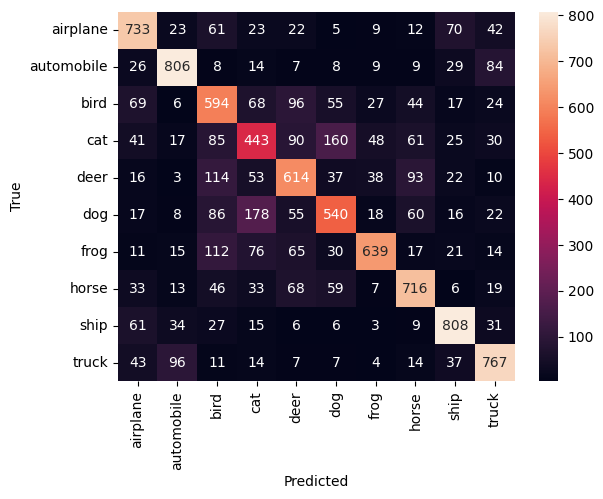

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test_scaled)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_categorical, axis=1)

print(classification_report(y_true, y_pred_labels, target_names=classes))

cm = confusion_matrix(y_true, y_pred_labels)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
def get_model():
  model = keras.Sequential([
      keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
      keras.layers.MaxPooling2D((2,2)),

      keras.layers.Conv2D(64,(3,3),activation='relu'),
      keras.layers.MaxPooling2D((2,2)),

      keras.layers.Flatten(),
      keras.layers.Dense(64,activation='relu'),
      keras.layers.Dense(10,activation='softmax')
  ])

  model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01,momentum=0.9),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [ ]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
  cpu_model = get_model()
  cpu_model.fit(X_train_scaled,y_train_categorical,epochs=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 354s 225ms/step - accuracy: 0.3224 - loss: 1.8373
6min 24s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
  cpu_model = get_model()
  cpu_model.fit(X_train_scaled,y_train_categorical,epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3255 - loss: 1.8245
8.45 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
